In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data load

In [2]:
train = pd.read_csv("./data/Obesity Risk/train.csv")
test = pd.read_csv("./data/Obesity Risk/test.csv")

train.shape, test.shape

((20758, 18), (13840, 17))

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

# EDA

In [7]:
# index = id로 설정
train.set_index("id", drop=True, inplace=True)
test.set_index("id", drop=True, inplace=True)

In [8]:
# 수치형, 범주형 변수 리스트 저장
num_list = train.select_dtypes("number").columns.to_list()
cat_list = train.select_dtypes("object").columns.to_list()[:-1]  # target 변수 제외
print(f"{num_list}\n{cat_list}")

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


## 수치형 변수 변환

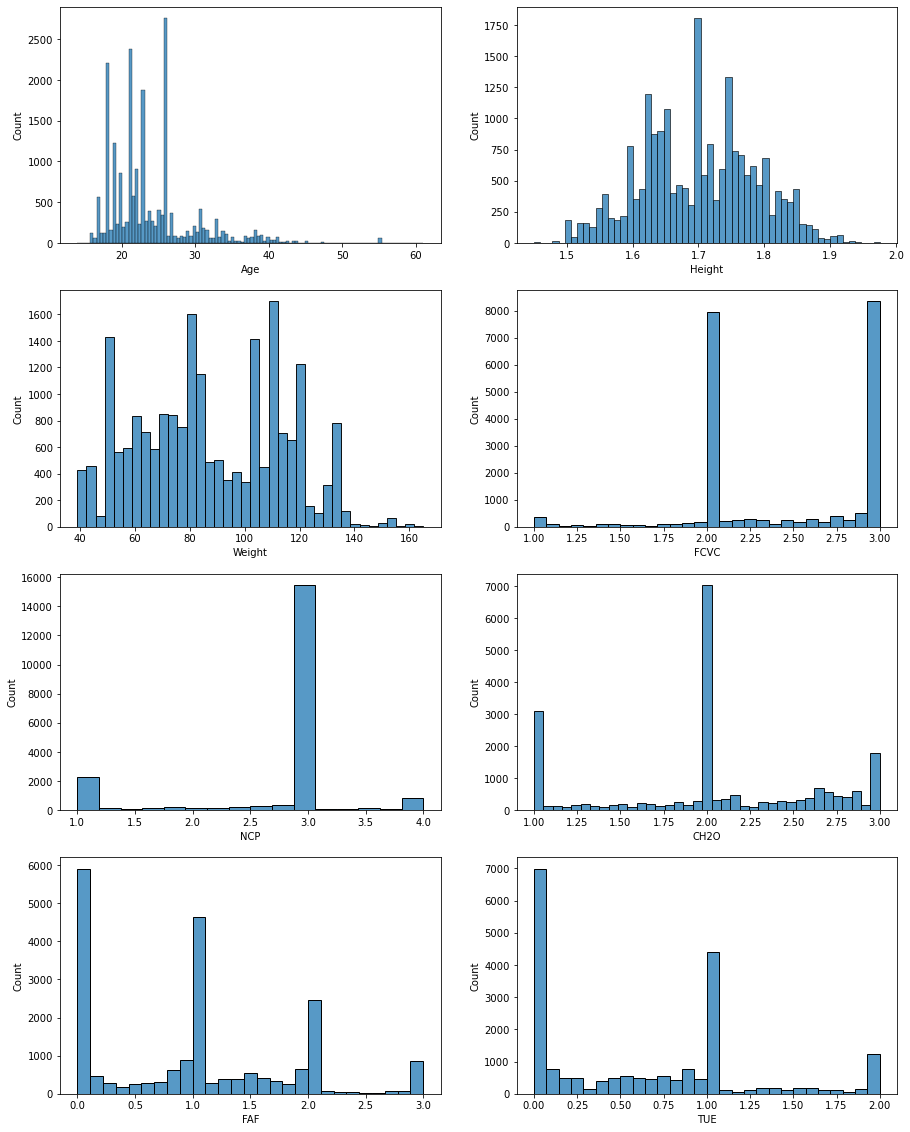

In [9]:
# train 분포 확인
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list):
    sns.histplot(data=train[col_name], ax=axes[i//2, i%2])

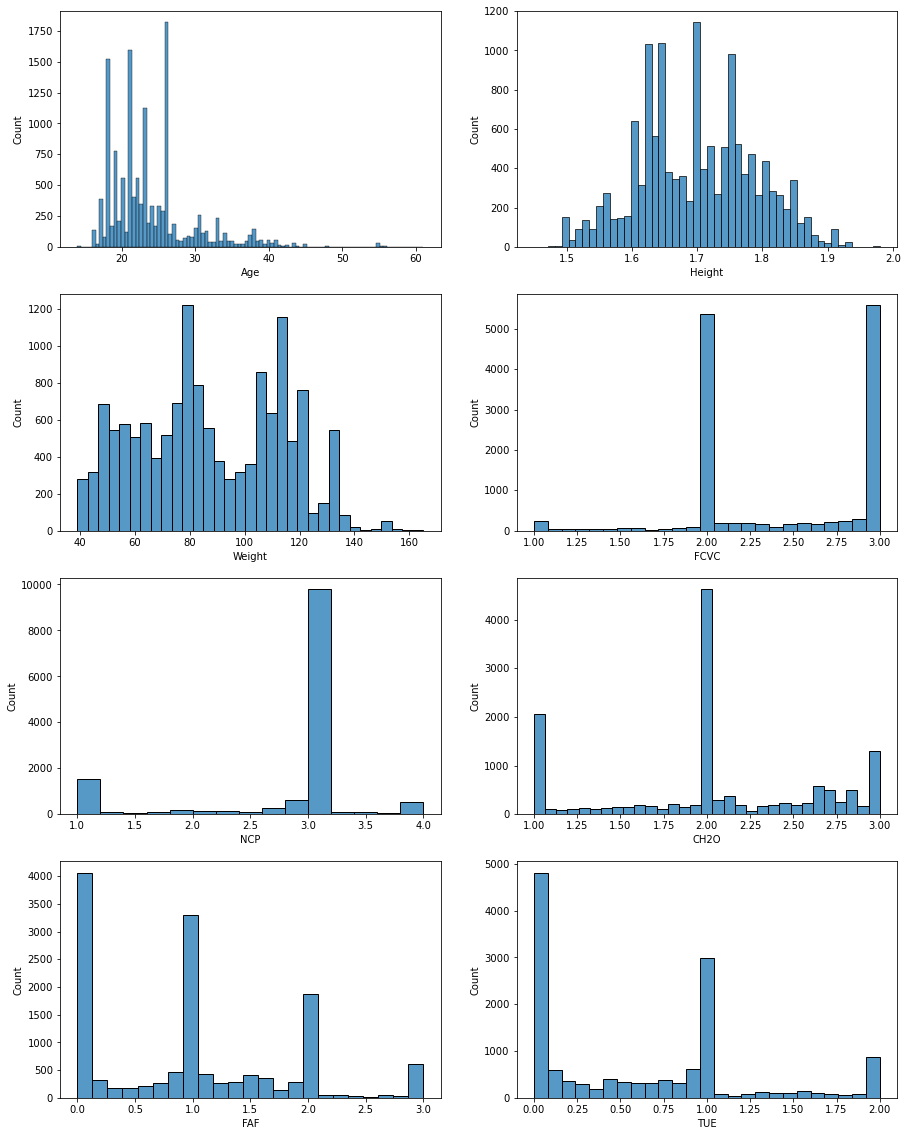

In [10]:
# test 분포 확인 --> train 데이터와 비슷함
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list):
    sns.histplot(data=test[col_name], ax=axes[i//2, i%2])

In [11]:
# 수치형 변수 변환 함수 생성
def Convert_df_numeric_vals(df):
    df_new = pd.DataFrame()
    
    # Age : 반올림 -> 정수로 변환
    df_new["Age"] = round(df["Age"]).astype("int")
    
    # Height, Weight : 그대로
    for col in ["Height", "Weight"]:
        df_new[col] = df[col]
    
    # FCVC, NCP, CH2O, FAF, TUE : 반올림 -> 라벨인코딩
    for col in ["FCVC", "NCP", "CH2O", "FAF", "TUE"]:
        df_new[col] = round(df[col]).astype("int")
    
    return df_new

In [12]:
train_new = Convert_df_numeric_vals(train)
test_new = Convert_df_numeric_vals(test)

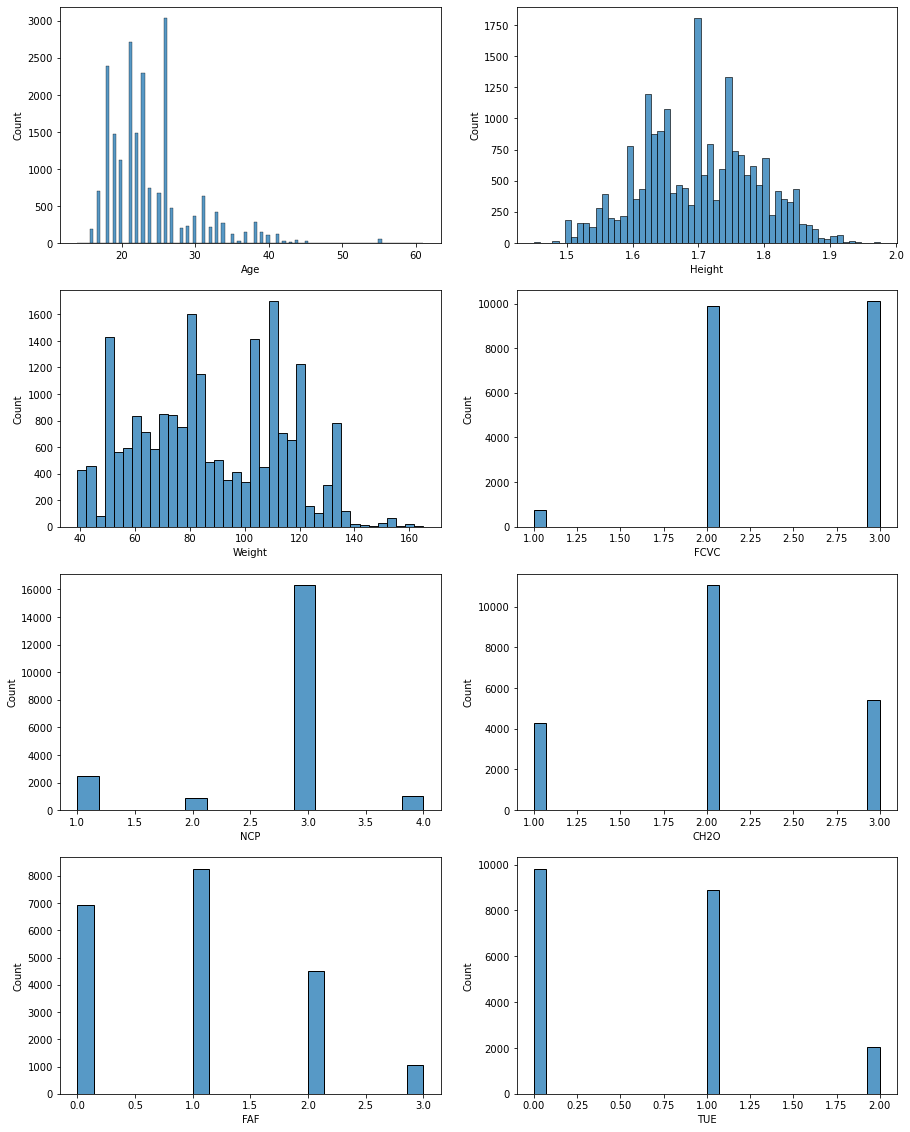

In [13]:
# train 변환 후
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list):
    sns.histplot(data=train_new[col_name], ax=axes[i//2, i%2])

## 범주형 변수 변환

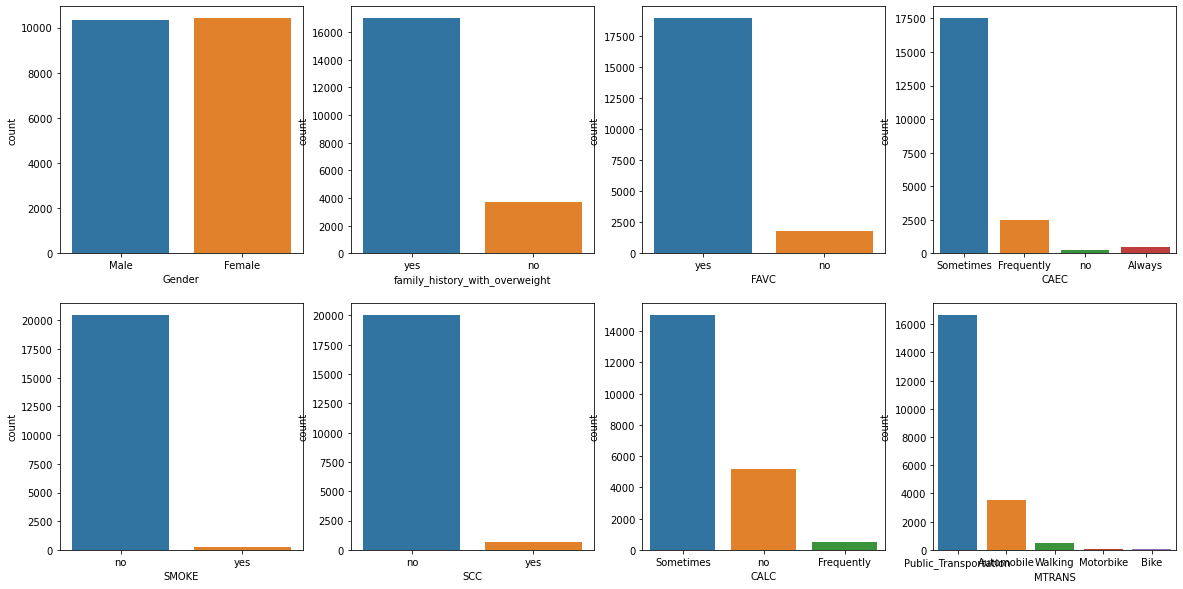

In [14]:
# train 범주 및 비율 확인
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i, col_name in enumerate(cat_list):
    sns.countplot(data=train, x=col_name, ax=axes[i//4, i%4])

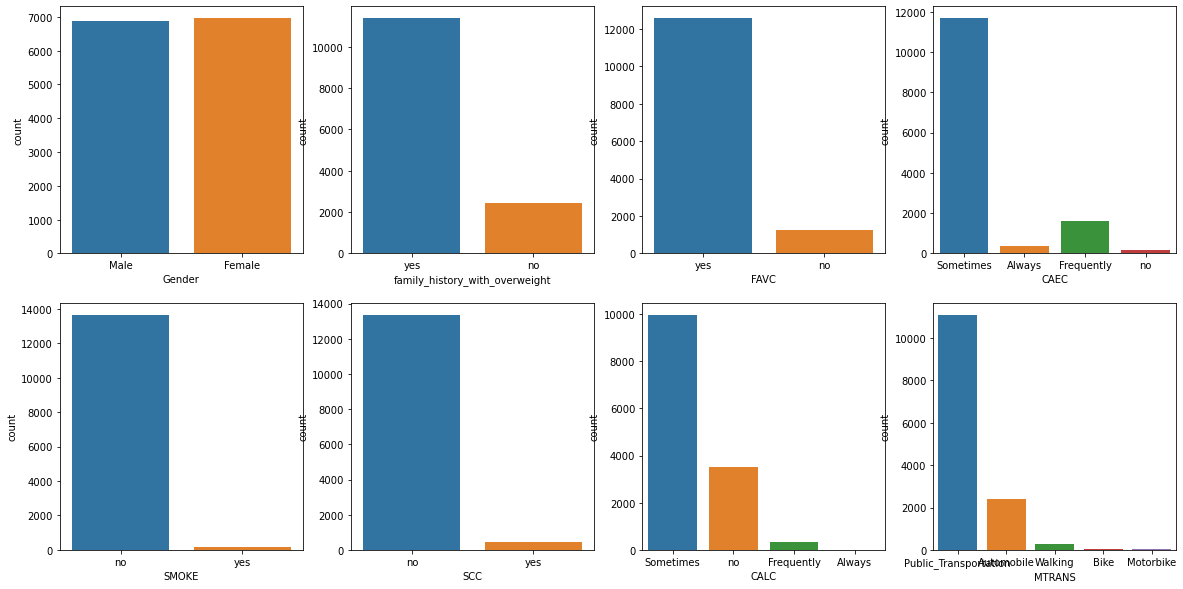

In [15]:
# test 데이터 범주 및 비율 확인
# CALC 변수: Always 범주 있음 (train에는 없었던 범주)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i, col_name in enumerate(cat_list):
    sns.countplot(data=test, x=col_name, ax=axes[i//4, i%4])

### MTRANS 범주 분포 확인

In [25]:
train["NObe"].unique()

array(['Overweight', 'Normal', 'Insufficient', 'Obesity'], dtype=object)

In [64]:
# MTRANS 범주 분포 확인
train["NObe"] = train["NObeyesdad"].apply(lambda x : x.split("_")[0])
train["NObe"] = train["NObe"].astype("category")
train["NObe"] = train["NObe"].cat.set_categories(["Insufficient","Normal","Overweight","Obesity"], ordered=True)

train[["MTRANS","NObe"]].value_counts()

MTRANS                 NObe        
Public_Transportation  Obesity         8472
                       Overweight      3484
                       Normal          2565
                       Insufficient    2166
Automobile             Obesity         1691
                       Overweight      1257
                       Normal           309
                       Insufficient     277
Walking                Overweight       185
                       Normal           177
                       Insufficient      74
                       Obesity           31
Motorbike              Normal            17
Bike                   Normal            14
                       Overweight        13
Motorbike              Overweight        10
                       Obesity            7
                       Insufficient       4
Bike                   Obesity            3
                       Insufficient       2
dtype: int64

<AxesSubplot:xlabel='MTRANS', ylabel='count'>

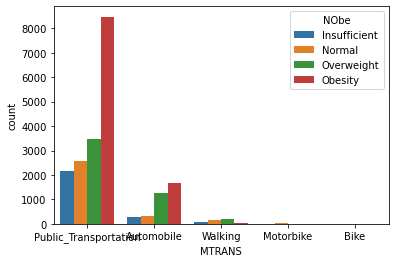

In [60]:
sns.countplot(data=train, x="MTRANS", hue="NObe")

<AxesSubplot:xlabel='NObe', ylabel='Count'>

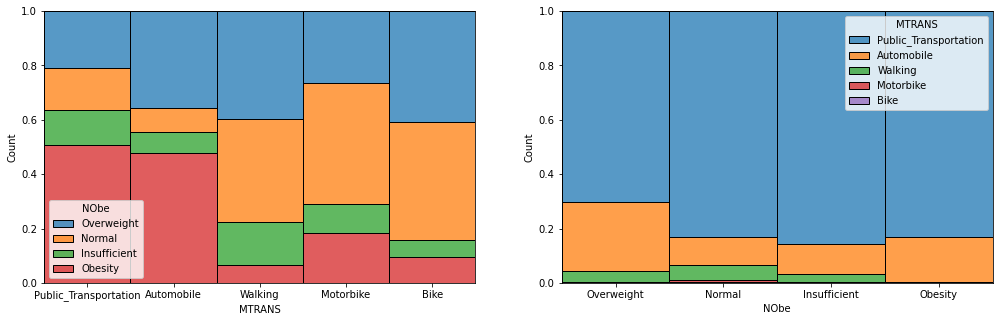

In [63]:
# 범주별 비율 확인
fig, ax = plt.subplots(ncols=2, figsize=(17,5))

sns.histplot(data=train, x="MTRANS", multiple="fill", hue="NObe", ax=ax[0])
sns.histplot(data=train, x="NObe", multiple="fill", hue="MTRANS", ax=ax[1])

<AxesSubplot:xlabel='NObe', ylabel='Count'>

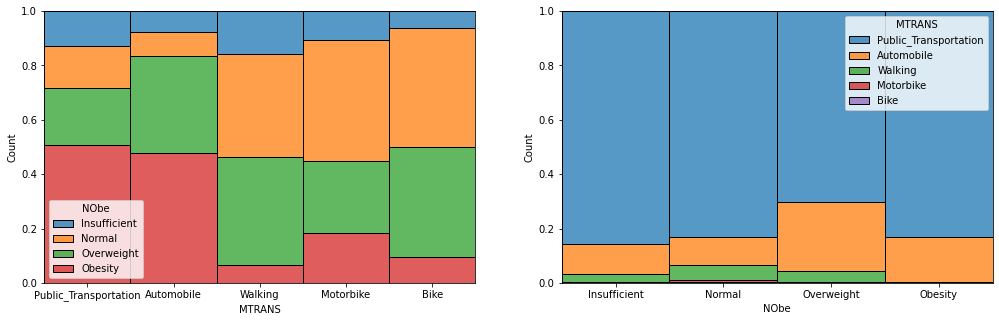

In [61]:
# 범주별 비율 확인(3/2 확인)
fig, ax = plt.subplots(ncols=2, figsize=(17,5))

sns.histplot(data=train, x="MTRANS", multiple="fill", hue="NObe", ax=ax[0])
sns.histplot(data=train, x="NObe", multiple="fill", hue="MTRANS", ax=ax[1])

- MTRANS 범주에 따른 비율
    - Motorbike와 Bike가 비슷하고 수량이 적기에 합쳐도 된다고 생각해 같은 범주로 만들었으나, 그래프를 잘못 봐서 결론을 잘못 내렸다...
    - 이후 MTRANS 변수를 제거하고 모델링 했을 때 더 좋은 성능이 나왔던 것이 이것 때문이었을 수 있겠다.

In [87]:
# 범주형 변수 라벨 인코딩
def Convert_df_categoric_vals(df, df_new):    
    # 이진형 변수 -> 원핫인코딩 : Gender, family_history_with_overweight, FAVC, SMOKE, SCC
    onehot_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    onehot = pd.get_dummies(df[onehot_cols], drop_first=True)
    onehot.columns = onehot_cols
    df_new = df_new.join(onehot)
    '''
    Gender: Female=0, Male=1
    Others: No=0, Yes=1
    '''
    
    # 라벨인코딩 : CAEC, CALC, MTRANS
    le_dic = {"no":0, "Sometimes":1, "Frequently":2, "Always":3}
    for col in ["CAEC", "CALC"]:
        df_new[col] = df[col].replace(le_dic)

    le_dic_mtrans = {"Walking":0, "Motorbike":1, "Bike":1, "Automobile":2, "Public_Transportation":3}
    df_new["MTRANS"] = df["MTRANS"].replace(le_dic_mtrans)
    
    return df_new

In [91]:
train_new = Convert_df_categoric_vals(train, train_new)
test_new = Convert_df_categoric_vals(test, test_new)

## target 변수 인코딩

In [97]:
# 인코딩용 라벨 생성
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
labels_NO = {}
for i, label in enumerate(target_order):
    labels_NO[label]= i
labels_NO

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
 'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6}

In [104]:
y_train = train["NObeyesdad"].replace(labels_NO)

## bmi class 생성

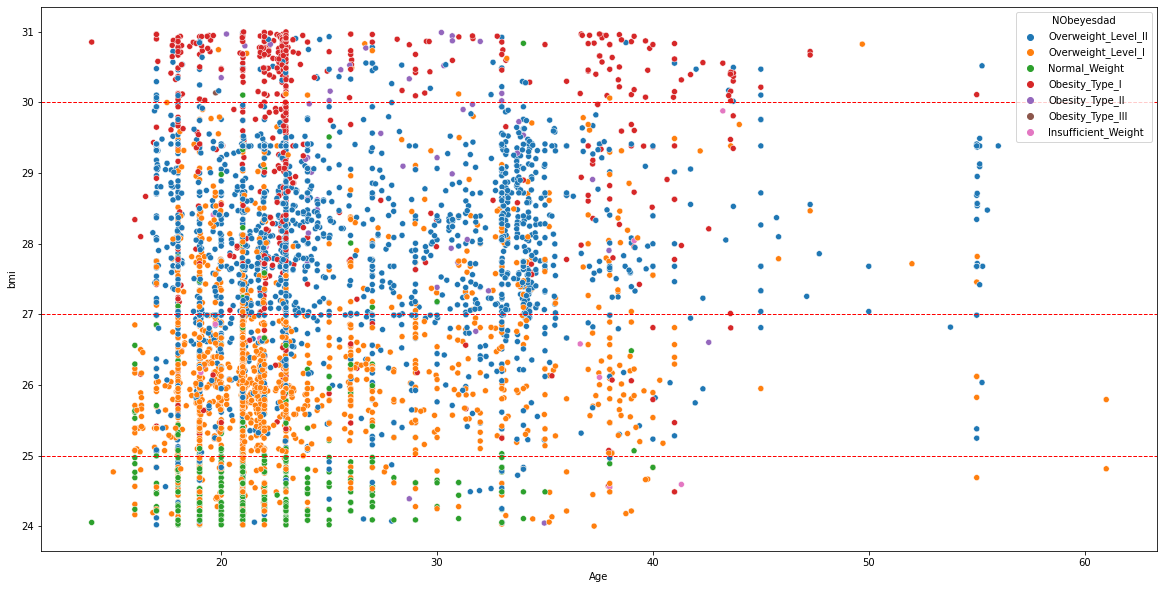

In [142]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train[(train["bmi"]>24)&(train["bmi"]<31)], x="Age", y="bmi", hue="NObeyesdad")

for bin in [25, 27, 30]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

In [143]:
# bmi
train["bmi"] = train["Weight"] / (train["Height"] ** 2)

# bmi_class
bins = [0, 18.5, 25, 27, 30, 35, 40, 70]
labels = range(7)
train["bmi_class"] = pd.cut(train["bmi"], right=False, bins=bins, labels=labels)

train[["Weight","Height","NObeyesdad","bmi","bmi_class"]].head()

,Weight,Height,NObeyesdad,bmi,bmi_class
id,,,,,
0,81.669950,1.699998,Overweight_Level_II,28.259565,3
1,57.000000,1.560000,Normal_Weight,23.422091,1
2,50.165754,1.711460,Insufficient_Weight,17.126706,0
3,131.274851,1.710730,Obesity_Type_III,44.855798,6
4,93.798055,1.914186,Overweight_Level_II,25.599151,2


<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

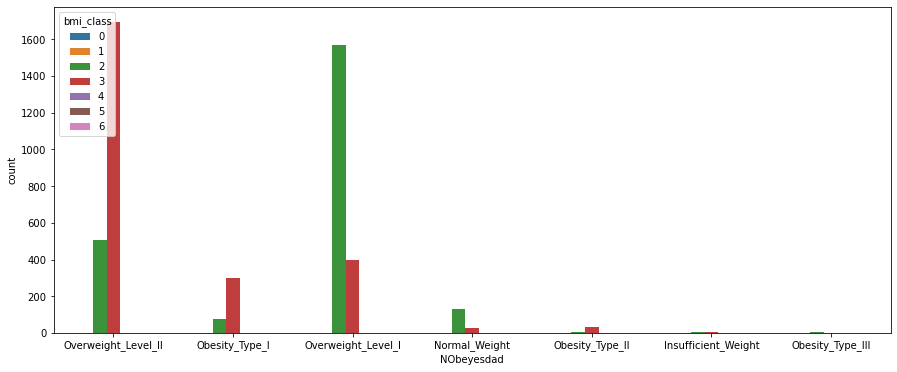

In [131]:
# 27
plt.figure(figsize=(15,6))
sns.countplot(data=train[(train["bmi_class"]==2)|(train["bmi_class"]==3)], x="NObeyesdad", hue="bmi_class")

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

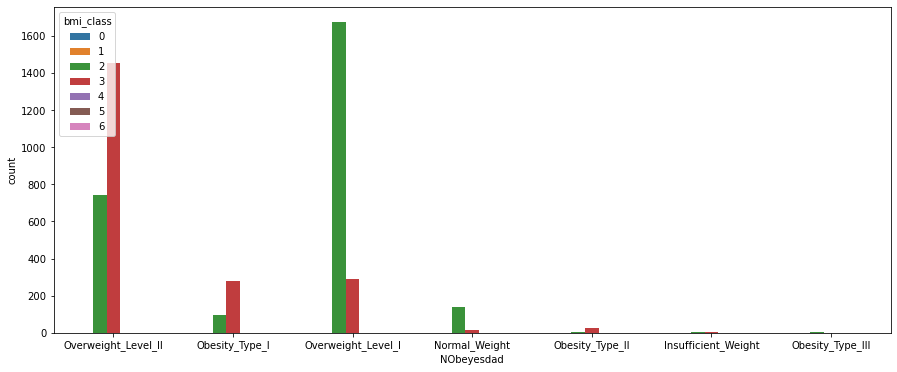

In [129]:
# 27.5
plt.figure(figsize=(15,6))
sns.countplot(data=train[(train["bmi_class"]==2)|(train["bmi_class"]==3)], x="NObeyesdad", hue="bmi_class")

- Overweight level 1,2를 구분하기 위한 경계를 27, 27.5 중 하나로 설정
    - 27로 설정했을 때 잘못 분류된 케이스가 더 적기 때문에 27로 설정하기로 함

In [144]:
# train_new, test_new에도 컬럼 추가
def add_bmi(df, df_new):
    # bmi
    df_new["bmi"] = df["Weight"] / (df["Height"] ** 2)

    # bmi_class
    bins = [0, 18.5, 25, 27, 30, 35, 40, 70]
    df_new["bmi_class"] = pd.cut(df_new["bmi"], right=False, bins=bins, labels=range(7))
    df_new["bmi_class"] = df_new["bmi_class"].astype("int")

    return df_new

In [145]:
train_new = add_bmi(train, train_new)
test_new = add_bmi(test, test_new)

## 완성 데이터 확인

In [146]:
train_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,
0,24,1.699998,81.669950,2,3,3,0,1,1,1,1,0,0,1,1,3,28.259565,3
1,18,1.560000,57.000000,2,3,2,1,1,0,1,1,0,0,2,0,2,23.422091,1
2,18,1.711460,50.165754,2,1,2,1,2,0,1,1,0,0,1,0,3,17.126706,0
3,21,1.710730,131.274851,3,3,2,1,1,0,1,1,0,0,1,1,3,44.855798,6
4,32,1.914186,93.798055,3,2,2,2,1,1,1,1,0,0,1,1,3,25.599151,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25,1.766626,114.187096,3,3,2,1,0,1,1,1,0,0,1,1,3,36.587084,5
20754,18,1.710000,50.000000,3,4,1,2,1,1,0,1,0,0,2,1,3,17.099278,0
20755,20,1.819557,105.580491,2,3,2,1,1,1,1,1,0,0,1,0,3,31.889841,4


In [147]:
test_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,
20758,27,1.848294,120.644178,3,3,3,1,0,1,1,1,0,0,1,1,3,35.315411,5
20759,21,1.600000,66.000000,2,1,3,1,0,0,1,1,0,0,1,1,3,25.781250,2
20760,26,1.643355,111.600553,3,3,3,0,0,0,1,1,0,0,1,1,3,41.324115,6
20761,21,1.553127,103.669116,2,3,3,0,0,1,1,1,0,0,1,1,3,42.976937,6
20762,26,1.627396,104.835346,3,3,3,0,1,0,1,1,0,0,1,1,3,39.584143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23,1.721384,78.030383,3,3,1,1,1,1,1,0,0,0,1,1,3,26.333478,2
34594,29,1.590000,62.000000,3,3,2,0,0,0,0,1,0,0,1,1,3,24.524346,1
34595,23,1.585547,44.376637,3,2,2,2,1,0,0,1,0,0,2,1,3,17.652091,0


## 상관관계 확인

<AxesSubplot:>

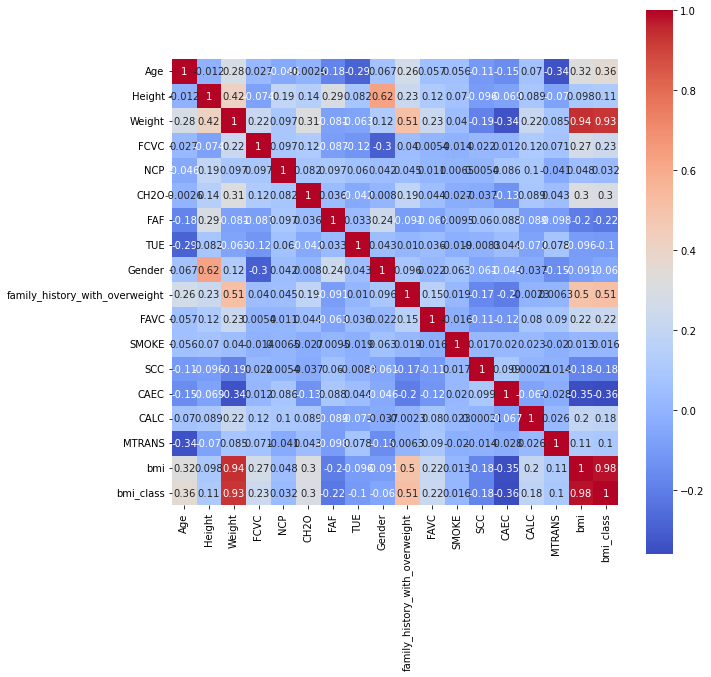

In [172]:
corr = train_new.corr()
# 히트맵으로 상관계수 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True)

In [157]:
# 저장
train_new.to_csv("./data/train_new.csv", index="id")
test_new.to_csv("./data/test_new.csv", index="id")
y_train.to_csv("./data/y_train.csv", index="id")

# trial 1 : RFC

## data split

In [32]:
X = train[train.columns[:-1]]
y = train["NObeyesdad"]
X.shape, y.shape

((20758, 16), (20758,))

In [36]:
# Make Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16606, 16), (4152, 16), (16606,), (4152,))

## target encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_target = LabelEncoder()

In [40]:
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

## Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [64]:
X_train_scaled = scaler.fit_transform(X_train.select_dtypes("number"))
X_val_scaled = scaler.transform(X_val.select_dtypes("number"))

In [67]:
X_train_new = pd.DataFrame(X_train_scaled,
                           index=X_train.select_dtypes("number").index, 
                           columns=X_train.select_dtypes("number").columns)

X_val_new = pd.DataFrame(X_val_scaled,
                         index=X_val.select_dtypes("number").index,
                         columns=X_val.select_dtypes("number").columns)

## Encoding

In [68]:
for col in cat_list[:-1]:
    X_train_new[col] = le.fit_transform(X_train[col])
    X_val_new[col] = le.transform(X_val[col])

In [69]:
X_train_new.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
id,,,,,,,,,,,,,,,,
4515,0.190476,0.494613,0.404097,0.500000,0.000000,0.500000,0.333333,1.000000,1,1,1,2,0,0,1,3
7949,0.642857,0.361448,0.300886,1.000000,0.000000,0.500000,0.000000,0.000000,0,1,1,2,0,0,1,0
20677,0.095238,0.665826,0.134160,0.500000,1.000000,0.500000,0.666667,0.500000,1,1,1,1,0,0,2,0
18079,0.095238,0.475590,0.364400,0.500000,0.666667,0.500000,0.666667,0.500000,1,1,1,1,0,0,0,3
5129,0.207984,0.759850,0.655439,0.676162,0.566657,0.678989,0.561527,0.369804,1,1,1,2,0,0,1,3


## Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

## RandomSearchCV

In [71]:
max_depth = np.random.randint(1,20,10)
max_features = np.random.uniform(0.4, 1.0, 100)
param_distributions = {"max_depth": max_depth,
                      "max_features": max_features,
                      "min_samples_split": list(range(2,7))}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                        param_distributions,
                        n_iter=100,
                        scoring="accuracy",
                        n_jobs=-1,
                        cv=5,
                        verbose=2,
                        random_state=42)

clf.fit(X_train_new, y_train_encoded)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([13,  3, 17, 10,  6,  9,  4, 10,  4,  3]),
                                        'max_features': array([0.855014  , 0.43150107, 0.5871656 , 0.97339187, 0.85512933,
       0.87374648, 0.46395496, 0.90427884, 0.56822105, 0.93813469,
       0.42973065, 0.56950584, 0.84393697, 0.96254089, 0.91507866,
       0.913...
       0.42592843, 0.8350803 , 0.65414137, 0.65713483, 0.56314498,
       0.7572864 , 0.91729405, 0.53091145, 0.48311989, 0.80337594,
       0.40491084, 0.50898492, 0.96906643, 0.78840008, 0.99120997,
       0.98945169, 0.9678839 , 0.41225888, 0.81234006, 0.8189719 ,
       0.89260964, 0.50334203, 0.9983996 , 0.81368982, 0.61083423]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy', verbose=2)

In [79]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.6234511467307055, 'max_depth': 13}

In [80]:
clf.best_score_

0.9000965885637182

In [81]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
94,3.109859,0.037589,0.062814,0.003656,4,0.610834,13,"{'min_samples_split': 4, 'max_features': 0.610...",0.896147,0.900933,0.896718,0.901837,0.904848,0.900097,0.003266,1
72,3.039568,0.040955,0.062858,0.002610,4,0.623451,13,"{'min_samples_split': 4, 'max_features': 0.623...",0.896147,0.900933,0.896718,0.901837,0.904848,0.900097,0.003266,1
85,2.933826,0.033933,0.067215,0.002926,5,0.530911,17,"{'min_samples_split': 5, 'max_features': 0.530...",0.897652,0.900632,0.890394,0.903945,0.906052,0.899735,0.005478,3
22,2.719373,0.032146,0.067815,0.002136,4,0.463995,17,"{'min_samples_split': 4, 'max_features': 0.463...",0.899759,0.898223,0.895815,0.901837,0.900632,0.899253,0.002084,4
11,3.103810,0.025092,0.063015,0.001265,5,0.623451,13,"{'min_samples_split': 5, 'max_features': 0.623...",0.895545,0.900632,0.892803,0.902138,0.903945,0.899013,0.004178,5


In [82]:
clf.score(X_val_new, y_val_encoded)

0.9063102119460501

__trial #1__
- RandomForestClassifier
- RandomSearchCV
- MinMaxScaling, LabelEncoding
- accuracy: (best) 0.90

## Submission

In [109]:
test = pd.read_csv("./data/Obesity Risk/test.csv")
test.set_index("id", drop=True, inplace=True)
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [97]:
test["CALC"].value_counts()

Sometimes     9979
no            3513
Frequently     346
Always           2
Name: CALC, dtype: int64

In [111]:
# CALC 별도 처리
cat_list_new = cat_list.remove("CALC")

In [114]:
# MinMaxScaling
test_new = scaler.transform(test.select_dtypes("number"))
test_new = pd.DataFrame(test_new,
                         index=test.select_dtypes("number").index,
                         columns=test.select_dtypes("number").columns)

# LabelEncoding
for col in cat_list[:-1]:
    le.fit_transform(X_train[col])
    test_new[col] = le.transform(test[col])

# CALC 별도 처리(따로 인코딩)
test_new["CALC"] = test["CALC"]
for i, val in enumerate(test["CALC"].unique()):
    test_new["CALC"] = test_new["CALC"].replace(val,i)

In [115]:
test_new.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,MTRANS,CALC
id,,,,,,,,,,,,,,,,
20758,0.307140,0.757698,0.647391,0.969308,0.666667,0.912815,0.285133,0.000000,1,1,1,2,0,0,3,0
20759,0.166667,0.285354,0.213553,0.500000,0.000000,1.000000,0.333333,0.000000,0,1,1,2,0,0,3,0
20760,0.285714,0.367831,0.575590,1.000000,0.666667,0.810939,0.000000,0.125251,0,1,1,2,0,0,3,0
20761,0.166173,0.196185,0.512620,0.500000,0.659303,0.893209,0.031617,0.000000,1,1,1,2,0,0,3,0
20762,0.285714,0.337471,0.521879,1.000000,0.666667,0.826766,0.000000,0.370534,0,1,1,2,0,0,3,0


target decoding

In [117]:
le_target = LabelEncoder()

In [118]:
y_train_encoded = le_target.fit_transform(y_train)
y_val_encoded = le_target.transform(y_val)

In [119]:
sub = clf.predict(test_new)
sub

array([3, 5, 4, ..., 0, 1, 3])

In [126]:
sub = pd.DataFrame({"NObeyesdad": le_target.inverse_transform(sub)}, index = test.index)
sub

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Overweight_Level_I
34595,Insufficient_Weight


In [131]:
sub.to_csv("./data/Submission_Obesity.csv", index="id")

In [132]:
pd.read_csv("./data/Submission_Obesity.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# trial 2 : RFC

## data_split

In [371]:
train_new = pd.read_csv("./data/train_new.csv", index_col="id")
y_train = pd.read_csv("./data/y_train.csv", index_col="id")
test_new = pd.read_csv("./data/test_new.csv", index_col="id")

In [372]:
X = train_new
y = y_train
X.shape, y.shape

((20758, 18), (20758, 1))

In [373]:
# feature selection
feature_names = X.columns.to_list()
feature_names.remove("Weight")
feature_names.remove("bmi")
feature_names

['Age',
 'Height',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'SMOKE',
 'SCC',
 'CAEC',
 'CALC',
 'MTRANS',
 'bmi_class']

In [374]:
# Make Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[feature_names], y, random_state=42, test_size=0.2, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16606, 16), (4152, 16), (16606, 1), (4152, 1))

In [375]:
X_test = test_new[feature_names]
X_test.shape

(13840, 16)

## Scaling

In [376]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [377]:
scale_cols = ["Age","Height"]

train_scaled = scaler.fit_transform(X_train[scale_cols])
val_scaled = scaler.transform(X_val[scale_cols])
test_scaled = scaler.transform(X_test[scale_cols])

train_scaled = pd.DataFrame(train_scaled, index=X_train.index, columns=scale_cols)
val_scaled = pd.DataFrame(val_scaled, index=X_val.index, columns=scale_cols)
test_scaled = pd.DataFrame(test_scaled, index=X_test.index, columns=scale_cols)

X_train_new[scale_cols] = train_scaled
X_val_new[scale_cols] = val_scaled
X_test_new[scale_cols] = test_scaled

C:\Users\user\AppData\Local\Temp/ipykernel_26892/1862679384.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new[scale_cols] = test_scaled


## Random Forest Classifier

In [378]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

## RandomSearchCV

In [379]:
max_depth = np.random.randint(1,20,10)
max_features = np.random.uniform(0.4, 1.0, 100)
param_distributions = {"max_depth": max_depth,
                      "max_features": max_features,
                      "min_samples_split": list(range(2,7))}

In [380]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                        param_distributions,
                        n_iter=200,
                        scoring="accuracy",
                        n_jobs=-1,
                        cv=5,
                        verbose=2,
                        random_state=42)

clf.fit(X_train_new, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': array([15,  9, 17, 10, 12,  9, 10, 13,  8,  8]),
                                        'max_features': array([0.42384664, 0.76119802, 0.78160531, 0.73509053, 0.90832242,
       0.83885836, 0.4743072 , 0.54567451, 0.55128114, 0.4012875 ,
       0.61507845, 0.61818475, 0.94824733, 0.93990386, 0.57948706,
       0....
       0.70228834, 0.82875557, 0.64609149, 0.49835243, 0.54855507,
       0.7819227 , 0.69666241, 0.89977483, 0.63427599, 0.53761355,
       0.99248405, 0.99057503, 0.80457389, 0.76159263, 0.8555738 ,
       0.49457399, 0.91148698, 0.49774651, 0.71418109, 0.61725925,
       0.57421057, 0.52283276, 0.96313754, 0.62387308, 0.85679998]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy', verbose=2)

In [381]:
clf.best_params_

{'min_samples_split': 5, 'max_features': 0.4350101074912416, 'max_depth': 17}

In [382]:
clf.best_score_

0.8801040611248979

In [383]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
109,2.394078,0.020332,0.111989,0.012169,5,0.43501,17,"{'min_samples_split': 5, 'max_features': 0.435...",0.872065,0.879253,0.872930,0.888287,0.887986,0.880104,0.007013,1
163,2.371426,0.092645,0.097922,0.004919,5,0.40531,17,"{'min_samples_split': 5, 'max_features': 0.405...",0.872065,0.879253,0.872930,0.888287,0.887986,0.880104,0.007013,1
98,2.953085,0.100176,0.098930,0.003945,5,0.520538,15,"{'min_samples_split': 5, 'max_features': 0.520...",0.867851,0.876543,0.874435,0.888889,0.890394,0.879623,0.008682,3
107,2.720811,0.051690,0.107272,0.005428,2,0.43501,17,"{'min_samples_split': 2, 'max_features': 0.435...",0.872065,0.876543,0.876242,0.882867,0.890093,0.879562,0.006296,4
31,2.319943,0.034174,0.086312,0.001986,5,0.498352,15,"{'min_samples_split': 5, 'max_features': 0.498...",0.868754,0.878049,0.874737,0.886781,0.888588,0.879382,0.007427,5


In [384]:
clf.score(X_val_new, y_val)

0.8730732177263969

__trial #2__
- RandomForestClassifier
- RandomSearchCV
- MinMaxScaling
- OneHotEncoding, LabelEncoding
- feature selection
    - (-) Weight, bmi
    - (+) bmi_class
- accuracy:

## Submission

In [386]:
flipped_dict = {v: k for k, v in labels_NO.items()}

In [387]:
sub = clf.predict(X_test)
sub

array([5, 3, 6, ..., 0, 1, 5], dtype=int64)

In [388]:
sub = pd.DataFrame({"NObeyesdad": sub}, index = X_test.index)
sub["NObeyesdad"] = sub["NObeyesdad"].replace(flipped_dict)
sub

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_II
20760,Obesity_Type_III
20761,Obesity_Type_II
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Normal_Weight
34595,Insufficient_Weight


In [391]:
sub.to_csv("./data/Submission_Obesity_RFC2.csv")

In [392]:
pd.read_csv("./data/Submission_Obesity_RFC2.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_II
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# trial 3 : LightGBM

In [341]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [345]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# LightGBM 모델 파라미터 설정 (분류 문제로 설정)
params = {
    'objective': 'multiclass',
    'num_class': 7,  # 클래스의 수
    'metric': 'multi_logloss',  # 평가 지표
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# LightGBM 모델 학습
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[val_data])
# , early_stopping_rounds=10)

# 테스트 데이터에 대한 예측
y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
y_pred = [np.argmax(pred) for pred in y_pred]

# 정확도 출력
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
Accuracy: 0.8817437379576107


In [348]:
# LightGBM 모델을 사용했을 경우
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test = [int(pred.argmax()) for pred in y_pred_test]

In [353]:
sub = pd.DataFrame({"NObeyesdad": y_pred_test}, index = X_test.index)
sub["NObeyesdad"] = sub["NObeyesdad"].replace(flipped_dict)
sub

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Normal_Weight
34595,Insufficient_Weight


In [354]:
sub.to_csv("./data/Submission_Obesity_lgbm.csv", index="id")

In [356]:
pd.read_csv("./data/Submission_Obesity_lgbm.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# trial 4 : XGB

In [393]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [402]:
train_new = pd.read_csv("./data/train_new.csv", index_col="id")
y_train = pd.read_csv("./data/y_train.csv", index_col="id")
test_new = pd.read_csv("./data/test_new.csv", index_col="id")

In [403]:
X = train_new
y = y_train
X.shape, y.shape

((20758, 18), (20758, 1))

In [408]:
# feature selection
feature_names = X.columns.to_list()
feature_names.remove("bmi")
feature_names.remove("bmi_class")
print(feature_names)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS']


In [409]:
# Make Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[feature_names], y, random_state=42, test_size=0.2, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16606, 16), (4152, 16), (16606, 1), (4152, 1))

In [410]:
X_test = test_new[feature_names]
X_test.shape

(13840, 16)

In [412]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost 데이터셋 생성
train_data = xgb.DMatrix(X_train, label=y_train)
val_data = xgb.DMatrix(X_val, label=y_val)

# XGBoost 모델 파라미터 설정 (분류 문제로 설정)
params = {
    'objective': 'multi:softmax',
    'num_class': 7,  # 클래스의 수
    'eval_metric': 'mlogloss',  # 평가 지표
    'max_depth': 3,
    'learning_rate': 0.1,
}

# XGBoost 모델 학습
num_round = 100
bst = xgb.train(params, train_data, num_round, evals=[(val_data, 'test')], early_stopping_rounds=10)

# 테스트 데이터에 대한 예측
y_pred = bst.predict(val_data)

# 정확도 출력
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

[0]	test-mlogloss:1.73822
[1]	test-mlogloss:1.58325
[2]	test-mlogloss:1.46029
[3]	test-mlogloss:1.35929
[4]	test-mlogloss:1.27301
[5]	test-mlogloss:1.19818
[6]	test-mlogloss:1.13299


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	test-mlogloss:1.07536
[8]	test-mlogloss:1.02315
[9]	test-mlogloss:0.97727
[10]	test-mlogloss:0.93274
[11]	test-mlogloss:0.89404
[12]	test-mlogloss:0.85946
[13]	test-mlogloss:0.82741
[14]	test-mlogloss:0.79720
[15]	test-mlogloss:0.77012
[16]	test-mlogloss:0.74486
[17]	test-mlogloss:0.72267
[18]	test-mlogloss:0.70239
[19]	test-mlogloss:0.68168
[20]	test-mlogloss:0.66196
[21]	test-mlogloss:0.64441
[22]	test-mlogloss:0.62923
[23]	test-mlogloss:0.61313
[24]	test-mlogloss:0.59865
[25]	test-mlogloss:0.58462
[26]	test-mlogloss:0.57017
[27]	test-mlogloss:0.55690
[28]	test-mlogloss:0.54567
[29]	test-mlogloss:0.53437
[30]	test-mlogloss:0.52488
[31]	test-mlogloss:0.51476
[32]	test-mlogloss:0.50718
[33]	test-mlogloss:0.49852
[34]	test-mlogloss:0.49062
[35]	test-mlogloss:0.48267
[36]	test-mlogloss:0.47493
[37]	test-mlogloss:0.46801
[38]	test-mlogloss:0.46151
[39]	test-mlogloss:0.45517
[40]	test-mlogloss:0.44874
[41]	test-mlogloss:0.44356
[42]	test-mlogloss:0.43838
[43]	test-mlogloss:0.43358
[44]

In [413]:
test_data = xgb.DMatrix(X_test)
y_test_pred = bst.predict(test_data)

# 예측 결과 출력
print('Test Predictions:', y_test_pred)

Test Predictions: [5. 2. 6. ... 0. 1. 5.]


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [414]:
sub = pd.DataFrame({"NObeyesdad": y_test_pred}, index = X_test.index)
sub["NObeyesdad"] = sub["NObeyesdad"].replace(flipped_dict)
sub

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Overweight_Level_I
34595,Insufficient_Weight


In [415]:
sub.to_csv("./data/Submission_Obesity_xgb.csv")

In [416]:
pd.read_csv("./data/Submission_Obesity_xgb.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# trial 5 : LGBM
- trial 4에서 사용한 데이터 그대로 사용 (bmi, bmi_class 제거)

In [417]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# LightGBM 모델 파라미터 설정 (분류 문제로 설정)
params = {
    'objective': 'multiclass',
    'num_class': 7,  # 클래스의 수
    'metric': 'multi_logloss',  # 평가 지표
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# LightGBM 모델 학습
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[val_data])
# , early_stopping_rounds=10)

# 테스트 데이터에 대한 예측
y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
y_pred = [np.argmax(pred) for pred in y_pred]

# 정확도 출력
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
Accuracy: 0.9002890173410405


In [418]:
# test data
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test = [int(pred.argmax()) for pred in y_pred_test]

In [419]:
sub = pd.DataFrame({"NObeyesdad": y_pred_test}, index = X_test.index)
sub["NObeyesdad"] = sub["NObeyesdad"].replace(flipped_dict)
sub

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Overweight_Level_I
34595,Insufficient_Weight


In [420]:
sub.to_csv("./data/Submission_Obesity_lgbm2.csv")

In [421]:
pd.read_csv("./data/Submission_Obesity_lgbm2.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# target과의 상관계수

In [426]:
d = train_new.copy()
d["NObeyesdad"] = y
d

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS,bmi,bmi_class,NObeyesdad
id,,,,,,,,,,,,,,,,,,,
0,24,1.699998,81.669950,2,3,3,0,1,1,1,1,0,0,1,1,3,28.259565,3,3
1,18,1.560000,57.000000,2,3,2,1,1,0,1,1,0,0,2,0,2,23.422091,1,1
2,18,1.711460,50.165754,2,1,2,1,2,0,1,1,0,0,1,0,3,17.126706,0,0
3,21,1.710730,131.274851,3,3,2,1,1,0,1,1,0,0,1,1,3,44.855798,6,6
4,32,1.914186,93.798055,3,2,2,2,1,1,1,1,0,0,1,1,3,25.599151,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25,1.766626,114.187096,3,3,2,1,0,1,1,1,0,0,1,1,3,36.587084,5,5
20754,18,1.710000,50.000000,3,4,1,2,1,1,0,1,0,0,2,1,3,17.099278,0,0
20755,20,1.819557,105.580491,2,3,2,1,1,1,1,1,0,0,1,0,3,31.889841,4,5


<AxesSubplot:>

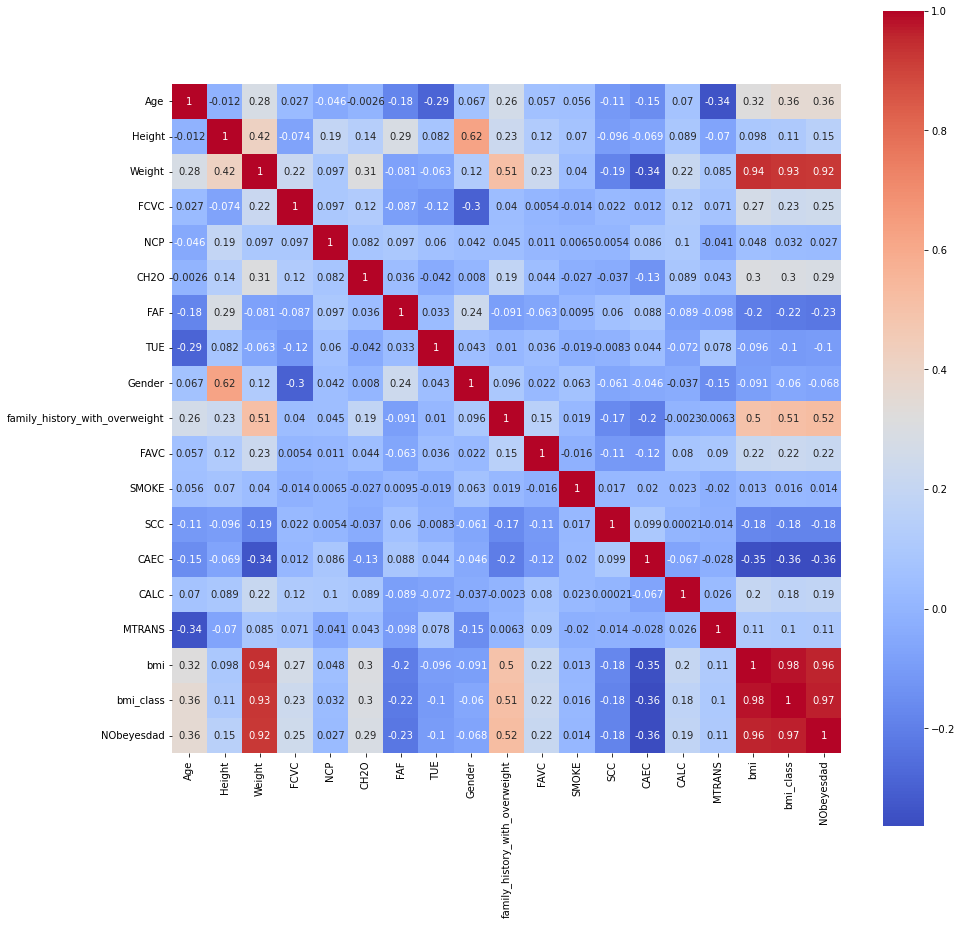

In [429]:
dcorr = d.corr()
# 히트맵으로 상관계수 시각화
plt.figure(figsize=(15, 15))
sns.heatmap(dcorr, annot=True, cmap='coolwarm', cbar=True, square=True)

# trial 6 : LGBM_bmi

In [430]:
def LGBM_modeling(X, y, test, feature_names):
    
    # Make Validation Set
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X[feature_names], y, random_state=42, test_size=0.2, stratify=y)
    
    # test set
    X_test = test_new[feature_names]
    
    
    # 모델링
    import lightgbm as lgb
    from sklearn.metrics import accuracy_score

    # LightGBM 데이터셋 생성
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # LightGBM 모델 파라미터 설정 (분류 문제로 설정)
    params = {
        'objective': 'multiclass',
        'num_class': 7,  # 클래스의 수
        'metric': 'multi_logloss',  # 평가 지표
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
    }

    # LightGBM 모델 학습
    num_round = 100
    bst = lgb.train(params, train_data, num_round, valid_sets=[val_data])

    # 테스트 데이터에 대한 예측
    y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
    y_pred = [np.argmax(pred) for pred in y_pred]

    # 정확도 출력
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy}')
    
    
    # test data
    y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
    y_pred_test = [int(pred.argmax()) for pred in y_pred_test]
    
    # DataFrame 만들기
    sub = pd.DataFrame({"NObeyesdad": y_pred_test}, index = X_test.index)
    sub["NObeyesdad"] = sub["NObeyesdad"].replace(flipped_dict)
    
    return {"val_accuracy": accuracy, "test_prediction": sub}

In [433]:
train_new = pd.read_csv("./data/train_new.csv", index_col="id")
y_train = pd.read_csv("./data/y_train.csv", index_col="id")
test_new = pd.read_csv("./data/test_new.csv", index_col="id")

In [472]:
# feature selection
feature_names = train_new.columns.to_list()
feature_names.remove("MTRANS")
feature_names.remove("SCC")
feature_names.remove("SMOKE")
feature_names.remove("bmi")
feature_names.remove("bmi_class")
print(feature_names)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC']


In [473]:
LGBM_modeling(train_new, y_train, test_new, feature_names)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 13
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
Accuracy: 0.9026974951830443


{'val_accuracy': 0.9026974951830443,
 'test_prediction':                 NObeyesdad
 id                        
 20758      Obesity_Type_II
 20759   Overweight_Level_I
 20760     Obesity_Type_III
 20761       Obesity_Type_I
 20762     Obesity_Type_III
 ...                    ...
 34593  Overweight_Level_II
 34594   Overweight_Level_I
 34595  Insufficient_Weight
 34596        Normal_Weight
 34597      Obesity_Type_II
 
 [13840 rows x 1 columns]}

In [474]:
sub.to_csv("./data/Submission_Obesity_lgbm3.csv")

In [475]:
pd.read_csv("./data/Submission_Obesity_lgbm3.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
